Mean :0.001417239583333333
Std :0.0022470675322925123


Text(0, 0.5, '$f (normalised)$')

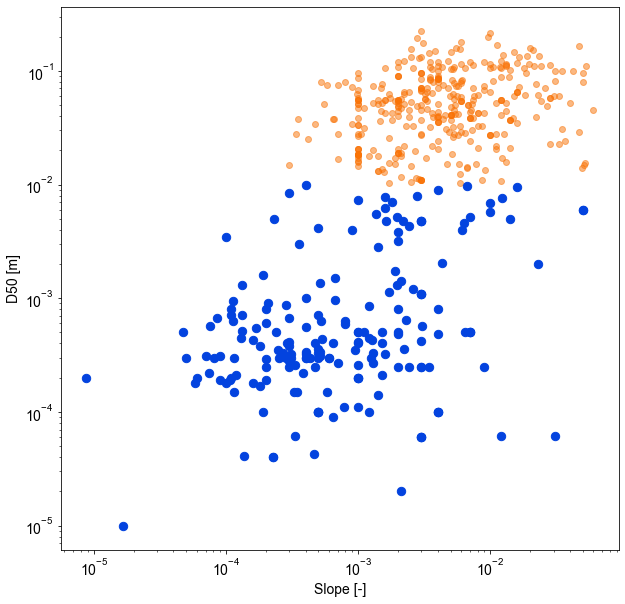

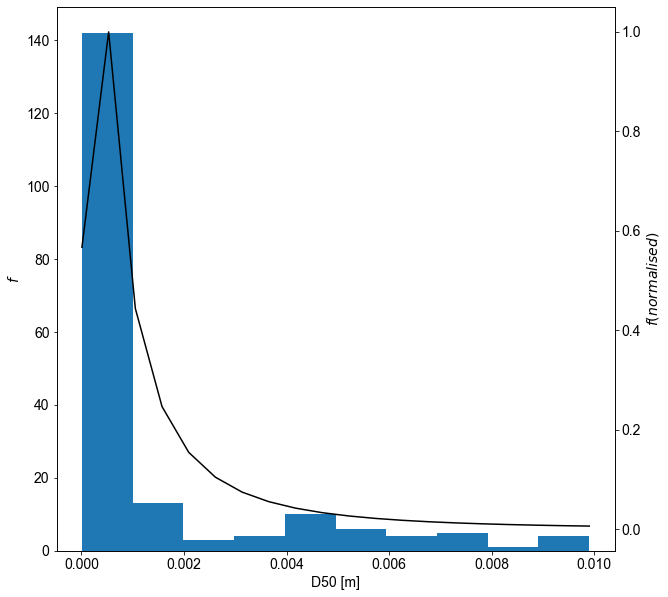

In [4]:
import numpy, scipy, scipy.optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy.stats import lognorm

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['pdf.fonttype'] = 42 # Truetype so text can be edited in Adobe Illustrator

scour_table_global = pd.read_csv('3rd_party/global_comp_slope_d50_depth.csv')

trampush_2014 = pd.read_csv('3rd_party/trampush_2014_utf8.csv')

Hbf = trampush_2014['Hbf [m]']
Wbf = trampush_2014['Wbf [m]']
slope = trampush_2014['S [-]']
D50_mm = trampush_2014['D50 [mm]']
D50 = trampush_2014['D50 [mm]']/1000

slope_lt_0_005 = slope
D50_lt_0_001 = D50<0.01
slope = slope[D50_lt_0_001]
D50 = D50[D50_lt_0_001]
Hbf = Hbf[D50_lt_0_001]
Wbf = Wbf[D50_lt_0_001]

# slope = slope[D50_gt_0_001]
# D50 = D50[D50_gt_0_001]
# Hbf = Hbf[D50_gt_0_001]

Hbf_deltas = scour_table_global['Hc [m]']
slope_deltas = scour_table_global['S (x 10-4)']/1000
D50_deltas = scour_table_global['D50 [mm]']/1000

# print(np.max(D50_deltas))
D50 = D50.append(D50_deltas)
slope = slope.append(slope_deltas)
Hbf = Hbf.append(Hbf_deltas)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.scatter(trampush_2014['S [-]'], trampush_2014['D50 [mm]']/1000, color='xkcd:orange', alpha=0.5)

ax.scatter(slope, D50, s=70, color='xkcd:blue')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel('D50 [m]')
ax.set_xlabel('Slope [-]')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.hist(D50, bins=10)

axb = ax.twinx()

print('Mean :'+str(np.mean(D50)))
print('Std :'+str(np.std(D50)))


shape,loc,scale = lognorm.fit(D50)

x_fit = np.linspace(D50.min(),D50.max(),20)

pdf = lognorm.pdf(x_fit, shape, loc, scale)

pdf = pdf/np.max(pdf)
axb.plot(x_fit, pdf, 'k')

ax.set_xlabel('D50 [m]')
ax.set_ylabel('$f$')
axb.set_ylabel('$f (normalised)$')


[0.29684617 0.39725544]
Mean :22.157441223275203
Std :15.040413447193014
R^2 =-0.7862153638989988


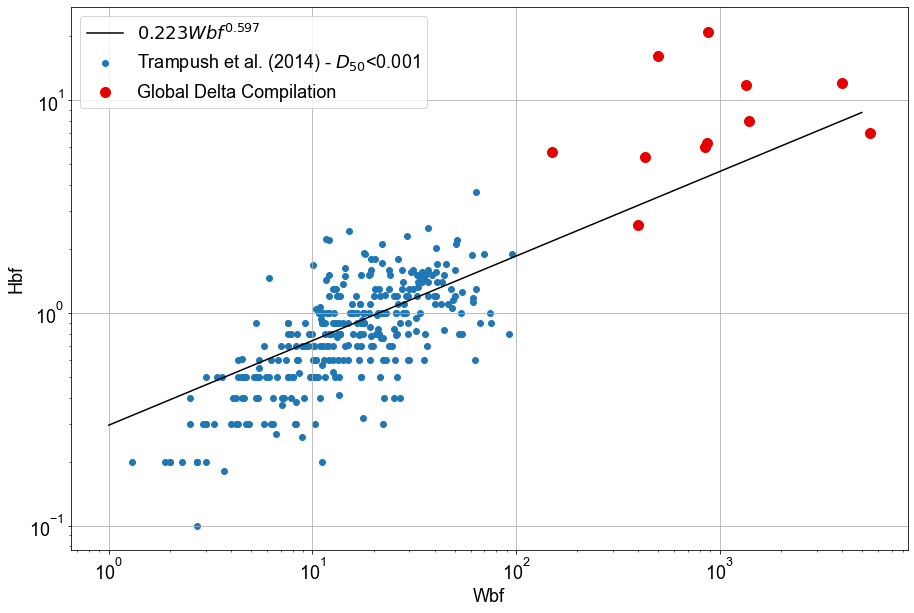

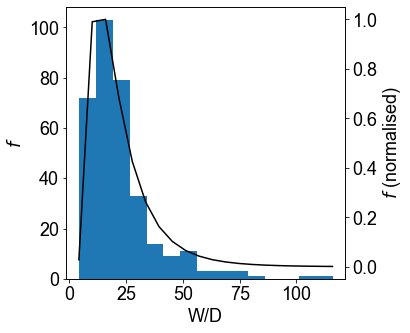

In [18]:
import numpy, scipy, scipy.optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy.stats import lognorm

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 18}

mpl.rc('font', **font)
mpl.rcParams['pdf.fonttype'] = 42 # Truetype so text can be edited in Adobe Illustrator

def power_law(x, a, b):
    return a*np.power(x,b)

scour_table_global = pd.read_csv('3rd_party/global_comp_slope_d50_depth.csv')

trampush_2014 = pd.read_csv('3rd_party/trampush_2014_utf8.csv')

Hbf = trampush_2014['Hbf [m]']
Wbf = trampush_2014['Wbf [m]']
slope = trampush_2014['S [-]']
D50_mm = trampush_2014['D50 [mm]']
D50 = trampush_2014['D50 [mm]']/1000

slope_lt_0_005 = slope
D50_lt_0_001 = D50<1
slope = slope[D50_lt_0_001]
D50 = D50[D50_lt_0_001]
Hbf = Hbf[D50_lt_0_001]
Wbf = Wbf[D50_lt_0_001]

nanmask = ~np.isnan(Wbf)
Wbf = Wbf[nanmask]
Hbf = Hbf[nanmask]

scour_table_global = pd.read_csv('3rd_party/global_comp_slope_d50_depth.csv')

width_global_comp = scour_table_global['Width [m]']
depth_global_comp = scour_table_global['Hc [m]']

params, pcov = scipy.optimize.curve_fit(power_law, Wbf, Hbf, p0 = [1.0,1.0],  bounds=(-np.inf, np.inf))

print(params)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

x_predict = np.linspace(1, 5000, 1000)
y_predict = params[0]*np.power(x_predict, params[1])
ax.scatter(Wbf, Hbf)
ax.scatter(width_global_comp, depth_global_comp, s=100, color='xkcd:red')
ax.plot(x_predict, y_predict, 'k')

ax.legend(['$'+str(0.223)+'Wbf^{'+str(0.597)+'}$', 'Trampush et al. (2014) - $D_{50}$<0.001', 
           'Global Delta Compilation'])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Hbf')
ax.set_xlabel('Wbf')
ax.grid('on')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

WD = Wbf/Hbf
WD.append(width_global_comp/depth_global_comp)


ax.hist(WD, bins=15)

axb = ax.twinx()

print('Mean :'+str(np.mean(WD)))
print('Std :'+str(np.std(WD)))


shape,loc,scale = lognorm.fit(WD)

x_fit = np.linspace(WD.min(),WD.max(),20)

pdf = lognorm.pdf(x_fit, shape, loc, scale)

pdf = pdf/np.max(pdf)
axb.plot(x_fit, pdf, 'k')
ax.set_xlabel('W/D')
ax.set_ylabel('$f$')
axb.set_ylabel('$f$ (normalised)')

y_pred = params[0]*np.power(width_global_comp, params[1])
y_true = depth_global_comp
from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)

print('R^2 ='+str(r2))
                         

In [15]:
# D50 Test

# WD scaling 
depth_WD_scaling = lambda Wbf : 0.223*np.power(Wbf, 0.597)


scour_table_global = pd.read_csv('3rd_party/S2_l_scour_table.csv')

D50_estimates = [] # Old Trampush Regression
D50_estimates2 = [] # New Trampush Regression
D50_estimates3 = [] # Tbf - Rep power law fit
Depth_estimates = []
Rep_estimates = []
Tbf_estimates = []
Tbf_estimates_depth_slope = []

a0 = -2.08
a1 = 0.254
a2 = -1.09

D50_trampush = lambda Hbf, slope: np.exp((np.log10(slope) - a0 - (a2 * np.log10(Hbf)))/a1)


# New log fit
a0_refit = 0.03789887
a1_refit  = -0.00227301
a2_refit  = 1.07673782

D50_trampush_refit = lambda Hbf, slope: np.exp(a0_refit+a1_refit*np.log10(Hbf)+a2_refit*np.log10(slope))

tbf_estimate = lambda H, sl, D: (H*sl)/(1.65*D)

R = 1.65
v = 1.0035E-06
g = 9.78

# Tbf - Rep Trampush et al., 2014 Regression 
a = 17
b = -0.51
invert_Rep = lambda x : np.power((1/a), 1/b)*np.power(x, 1/b)
invert_D50 = lambda rep : np.power((rep*v/np.sqrt(R*g)), 2/3)

for row in scour_table_global.iterrows():
    depth = depth_WD_scaling(row[1]['W [m]'])
    print(depth)
#     depth = Hbf_Dunne(row[1]['S [-]'], 8, 1000, 9.78)
    
    D50_estimate = D50_trampush(depth, row[1]['S [-]'])
    tbf_depth_slope = depth*row[1]['S [-]']*1000*9.78
    tbf = tbf_estimate(depth, row[1]['S [-]'], D50_estimate)
    
    D50_estimate2 = D50_trampush_refit(depth, row[1]['S [-]'])
    Depth_estimates.append(depth)
    D50_estimates.append(D50_estimate)
    D50_estimates2.append(D50_estimate2)

    Rep = invert_Rep(tbf_depth_slope)
    D50_estimate3 = invert_D50(Rep)
    D50_estimates3.append(D50_estimate3)
    
    Rep_estimates.append(Rep)
    Tbf_estimates.append(tbf)
    Tbf_estimates_depth_slope.append(tbf_depth_slope)
    
scour_table_global['Rep_estimates'] = Rep_estimates
scour_table_global['Tbf_depth_slope'] = Tbf_estimates_depth_slope  
scour_table_global['D50_estimate'] = D50_estimates
scour_table_global['D50_estimate2'] = D50_estimates2
scour_table_global['D50_estimate3'] = D50_estimates3
scour_table_global['Hbf_estimate'] = Depth_estimates

print(scour_table_global)

9.111501597173719
12.50742656543016
16.847803956154106
4.44049458408986
12.682295171333541
16.48595548509265
12.76912146947463
7.975073198319468
         River    From     S [-]  S_std [-]  D50 [m]  Hbf [m]  Hbf_std [m]  \
0         Nile  global  0.000064          0  0.00040     16.2            0   
1    Magdalena  global  0.000095          0  0.00035      6.0            0   
2      Orinoco  global  0.000060          0  0.00030      8.0            0   
3  Rhine-Meuse  global  0.000110          0  0.00050      5.0            0   
4       Danube  global  0.000050          0  0.00030      6.3            0   
5       Paraná  global  0.000040          0  0.00030     11.8            0   
6  Mississippi  global  0.000043          0  0.00030     21.0            0   
7      Huanghe  global  0.000064          0  0.00009      2.6            0   

      Cf  t_scour [months]  t_scour_st_err [months]  ...  L_scour [km]  \
0  0.002              1.54                     0.09  ...         61.92   
1  0

In [7]:
scour_table_global_out = pd.DataFrame()

scour_table_global_out['River'] = scour_table_global['River']
scour_table_global_out['S [-]'] = scour_table_global['S [-]']
scour_table_global_out['Hbf [m]'] = scour_table_global['Hbf [m]']
scour_table_global_out['Hbf (estimated w/ new power law) [m]'] = round(scour_table_global['Hbf_estimate'], 4)
scour_table_global_out['W [m]'] = scour_table_global['W [m]']
scour_table_global_out['D50 (reported) [m]'] = scour_table_global['D50 [m]']
scour_table_global_out['D50 (estimated) - Inverted from Rep [m]'] = round(scour_table_global['D50_estimate3'], 6)
scour_table_global_out['Tbf (depth slope product)'] = round(scour_table_global['Tbf_depth_slope'], 4)
scour_table_global_out['Rep (Inverted from Tbf)'] = round(scour_table_global['Rep_estimates'], 4)

scour_table_global_out.to_csv('scour_table_global_out_power.csv')
